
# FRRN Training Monitor

In [39]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from dltools import logging
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Speficy log file

In [40]:
LOG_FILE = "logs/frrn_a.log"
reader = logging.FileLogReader(LOG_FILE)

def fix_length(x, y):
    l = min(len(x), len(y))
    return x[:l], y[:l]

# Read logs

In [41]:
reader.update()

## Losses

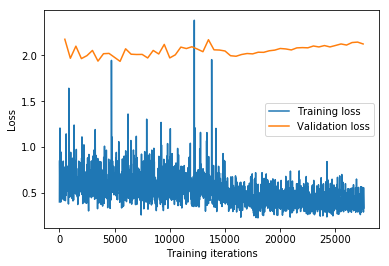

In [42]:
x_train = reader.logs("update_counter")
y_train = reader.logs("losses")
x_val = reader.logs("validation_checkpoint")
y_val = reader.logs("validation_loss")

plt.figure()
plt.plot(*fix_length(x_train, y_train))
plt.plot(*fix_length(x_val, y=y_val))
plt.legend(["Training loss", "Validation loss"])
plt.xlabel("Training iterations")
plt.ylabel("Loss")
plt.show()

## IoU scores

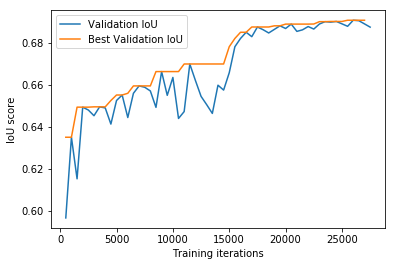

In [43]:
matrices = [np.asarray(m) for m in reader.logs("conf_matrix")]
num_labels = matrices[0].shape[0]
ious = [np.average(
    [m[i, i] / (np.sum(m[:, i]) + np.sum(m[i, :]) - m[i, i]) for i in
     range(0, num_labels)]) for m in
        matrices]
pixel_acc_scores = [np.sum(np.diag(m)) / np.sum(m) for m in
                    reader.logs("conf_matrix")]


x_iou = reader.logs("validation_checkpoint")
y_iou = ious
x_best_iou = reader.logs("validation_checkpoint")
y_best_iou = [np.max(ious[:i + 1]) for i in range(1, len(ious))]

plt.plot(*fix_length(x_iou, y_iou))
ax, = plt.plot(*fix_length(x_best_iou, y_best_iou))
plt.legend(["Validation IoU", "Best Validation IoU"])
plt.xlabel("Training iterations")
plt.ylabel("IoU score")
plt.show()

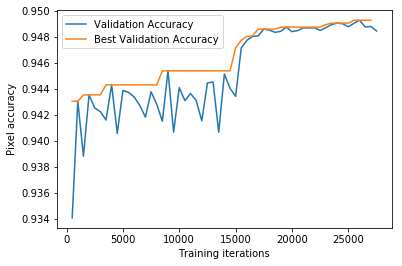

In [44]:
x_acc = reader.logs("validation_checkpoint")
y_acc = pixel_acc_scores
x_best_acc = reader.logs("validation_checkpoint")
y_best_acc = [np.max(pixel_acc_scores[:i + 1]) for i in range(1, len(pixel_acc_scores))]

plt.plot(*fix_length(x_acc, y_acc))
ax, = plt.plot(*fix_length(x_best_acc, y_best_acc))
plt.legend(["Validation Accuracy", "Best Validation Accuracy"])
plt.xlabel("Training iterations")
plt.ylabel("Pixel accuracy")
plt.show()

## Update time

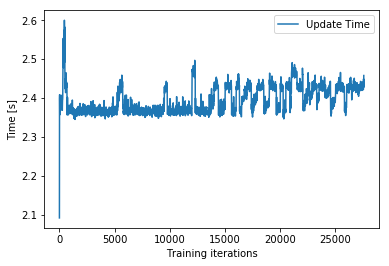

In [45]:
x_time = reader.logs("update_counter")
y_time = reader.logs("update_runtime")

plt.plot(*fix_length(x_time, y_time))
plt.legend(["Update Time"])
plt.xlabel("Training iterations")
plt.ylabel("Time [s]")
plt.show()